<a href="https://colab.research.google.com/github/merfurfu/IAT481A2/blob/main/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install opencv-python
!pip install nltk
!pip install librosa

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import nltk
import librosa


In [5]:
# Get the critical imports out of the way
#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')
from IPython.core.display import HTML
# Center matplotlib figures...
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [4]:
import librosa

def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    #print(stft_spectrogram.shape)
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    #print(chromagram.shape)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfc_coefficients

In [6]:
def get_features(file):
    # load an individual soundfile
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        # compute features of soundfile
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)
        feature_matrix=np.array([])

        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))

        return feature_matrix

In [57]:

#Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [53]:
#sex in RAVDESS female actors are even, male actors are odd
participantsex = {
    '01' : "male",
    '02': 'female',
    '03' : "male",
    '04': 'female',
    '05' : "male",
    '06': 'female',
    '07' : "male",
    '08': 'female',
    '09' : "male",
    '10': 'female',
    '11' : "male",
    '12': 'female',
    '13' : "male",
    '14': 'female',
    '15' : "male",
    '16': 'female',
    '17' : "male",
    '18': 'female',
    '19' : "male",
    '20': 'female',
    '21' : "male",
    '22': 'female',
    '23' : "male",
    '24': 'female'
}

In [8]:

#Emotions in the EmoDB dataset
emotionsEmo = {
  'W':'angry',
  'F':'happy',
  'T':'sad',
  'E':'disgust',
  'N':'neutral',
  'A':'fearful',
  'L':'boredom'
}

In [ ]:
?emotionsEmo

In [11]:
import os, glob

#there are 535 voice samples in EmoDB
def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/wav/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        #print(file_name)

        #since the emotion tag is on the fifth char we are using this to pull that one out
        emotion=emotionsEmo[(file_name[5])]
        #print(emotion)
        features = get_features(file)

        X.append(features)
        y.append(emotion)
        count += 1
        #changing it to 535 because EmoDB has 535 audio samples
        print('\r' + f' Processed {count}/{535} audio samples',end=' ')
    return np.array(X), np.array(y)


In [12]:
features, emotionsEmo = load_data()

 Processed 535/535 audio samples 

In [58]:
#1440 audio files?
def load_dataRAV():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        #print(file_name)
        #print(file_name.split("-")[2])

        emotion=emotions[(file_name.split("-")[2])]
        #print(emotion)
        features = get_features(file) #dont use this!!!!

        X.append(features) #original code dont use!
        y.append(emotion)
        count += 1
        print('\r' + f' Processed {count}/{1435} audio samples',end=' ')
    return np.array(X), np.array(y)

In [51]:
def get_genderRAVDESS():
  s = []
  count = 0
  for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        sex = participantsex[(file_name.split("-")[6])]
        #this code also works
        #sex of participant is indicated as the last segment and puts it in the array
        #sex = participantsex[(file_name.split("-")[-1])]
        s.append(sex)
        count += 1
        print('\r' + f' Processed {count}/{1435} audio samples',end=' ')
  return np.array(s)

In [65]:
participantsex = get_genderRAVDESS()

KeyError: '10.wav'

In [60]:
features, emotions = load_data()

 Processed 1435/1435 audio samples 

In [48]:
emotionsberlin = np.delete(emotionsEmo, "L")
emotions_list = np.unique(emotionsberlin)
print(emotions_list)

IndexError: arrays used as indices must be of integer (or boolean) type

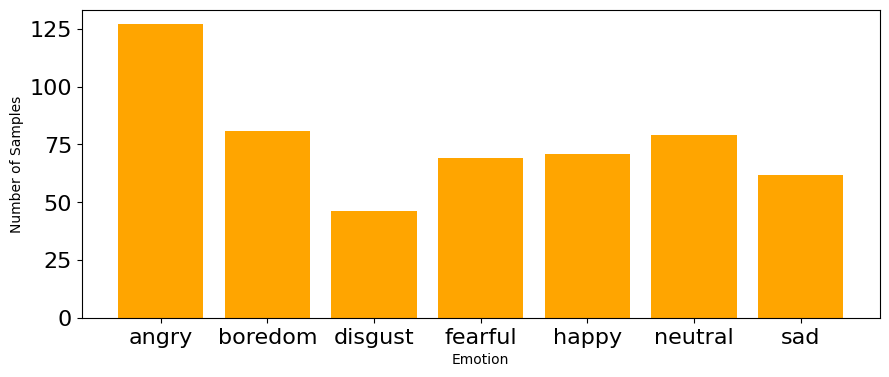

In [63]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotionsEmo, return_counts=True)

#print(emotion_list)
#emotion_list = np.delete(emotion_list, np.where(emotion_list == ["boredom"]))
plt.bar(x=range(7), height=count, color = "orange")
plt.xticks(ticks=range(7), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

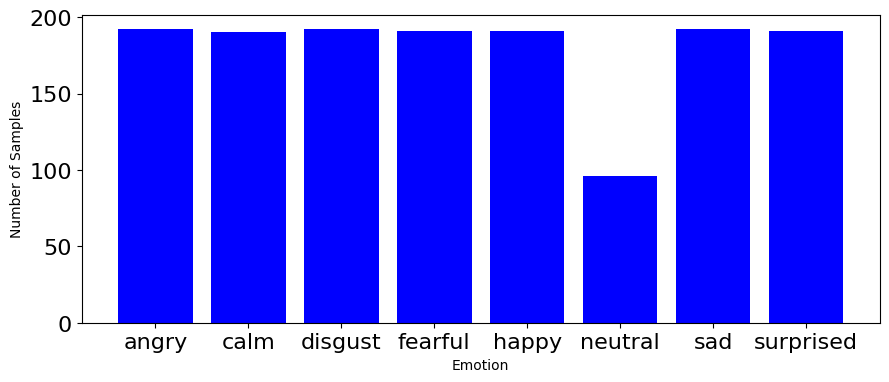

In [64]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,2)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotions, return_counts=True)
plt.bar(x=range(8), height=count, color = "blue")
plt.xticks(ticks=range(8), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()